In [1]:
!pip install pyproj

     |████████████████████████████████| 6.6MB 7.6MB/s 


In [17]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, ColorConverter

In [11]:
centerx=-7.31
centery=54.05
extent=2500
p=Proj('EPSG:3035')
CX,CY=p(centerx,centery)

In [12]:
ulx=CX-extent
uly=CY+extent
lrx=CX+extent
lry=CY-extent
offset=0

In [13]:
ds=gdal.Open('/content/drive/MyDrive/S2GLCmap/S2GLC_Europe_2017_v1.2.tif')
Topt=gdal.TranslateOptions(projWin= [ulx, uly, lrx, lry],projWinSRS='EPSG:3035')
gdal.Translate('S2GLC_Ballyhaise_2017_v1.2.tif',ds,options=Topt)
ds=None

In [14]:
ds=gdal.Open('S2GLC_Ballyhaise_2017_v1.2.tif')

In [34]:
labellist=['Clouds',
           'Artificial surfaces and constructions',
           'Cultivated areas',
           'Vineyards',
           'Broadleaf tree cover',
           'Coniferous tree cover',
           'Herbaceous vegetation',
           'Moors and Heathland',
           'Sclerophyllous vegetation',
           'Marshes',
           'Peatbogs',
           'Natural material surfaces',
           'Permanent snow covered surfaces',
           'Water bodies']

In [28]:
c0=(255/255.0,255/255.0,255/255.0,255/255.0)#Clouds
c1=(210/255.0,0/255.0,0/255.0,255/255.0)#Artificial surfaces and constructions
c2=(253/255.0,211/255.0,39/255.0,255/255.0)#Cultivated areas
c3=(176/255.0,91/255.0,16/255.0,255/255.0)#Vineyards
c4=(35/255.0,152/255.0,0/255.0,255/255.0)#Broadleaf tree cover
c5=(8/255.0,98/255.0,0/255.0,255/255.0)#Coniferous tree cover
c6=(249/255.0,150/255.0,39/255.0,255/255.0)#Herbaceous vegetation
c7=(141/255.0,139/255.0,0/255.0,255/255.0)#Moors and Heathland
c8=(95/255.0,53/255.0,6/255.0,255/255.0)#Sclerophyllous vegetation
c9=(149/255.0,107/255.0,196/255.0,255/255.0)#Marshes
c10=(77/255.0,37/255.0,106/255.0,255/255.0)#Peatbogs
c11=(154/255.0,154/255.0,154/255.0,255/255.0)#Natural material surfaces
c12=(106/255.0,255/255.0,255/255.0,255/255.0)#Permanent snow covered surfaces
c13=(20/255.0,69/255.0,249/255.0,255/255.0)#Water bodies


In [43]:
np.unique(Ar)

array([ 62,  73,  82,  83, 102, 103, 105, 106, 121, 162], dtype=uint8)

In [44]:
np.unique(Arp)

array([ 1.,  2.,  4.,  5.,  6.,  7.,  9., 10., 11., 13.])

In [70]:
Ar=ds.ReadAsArray()
U=[0,62,73,75,82,83,102,103,104,105,106,121,123,162]
scheme=[c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13]
newcmap = ListedColormap(scheme)
Arp=np.zeros(Ar.shape)
for i,u in enumerate(U):
    Arp[Ar==u]=i
#newcmap=ListedColormap(plotcmap)

In [81]:
np.max(Arp)

13.0

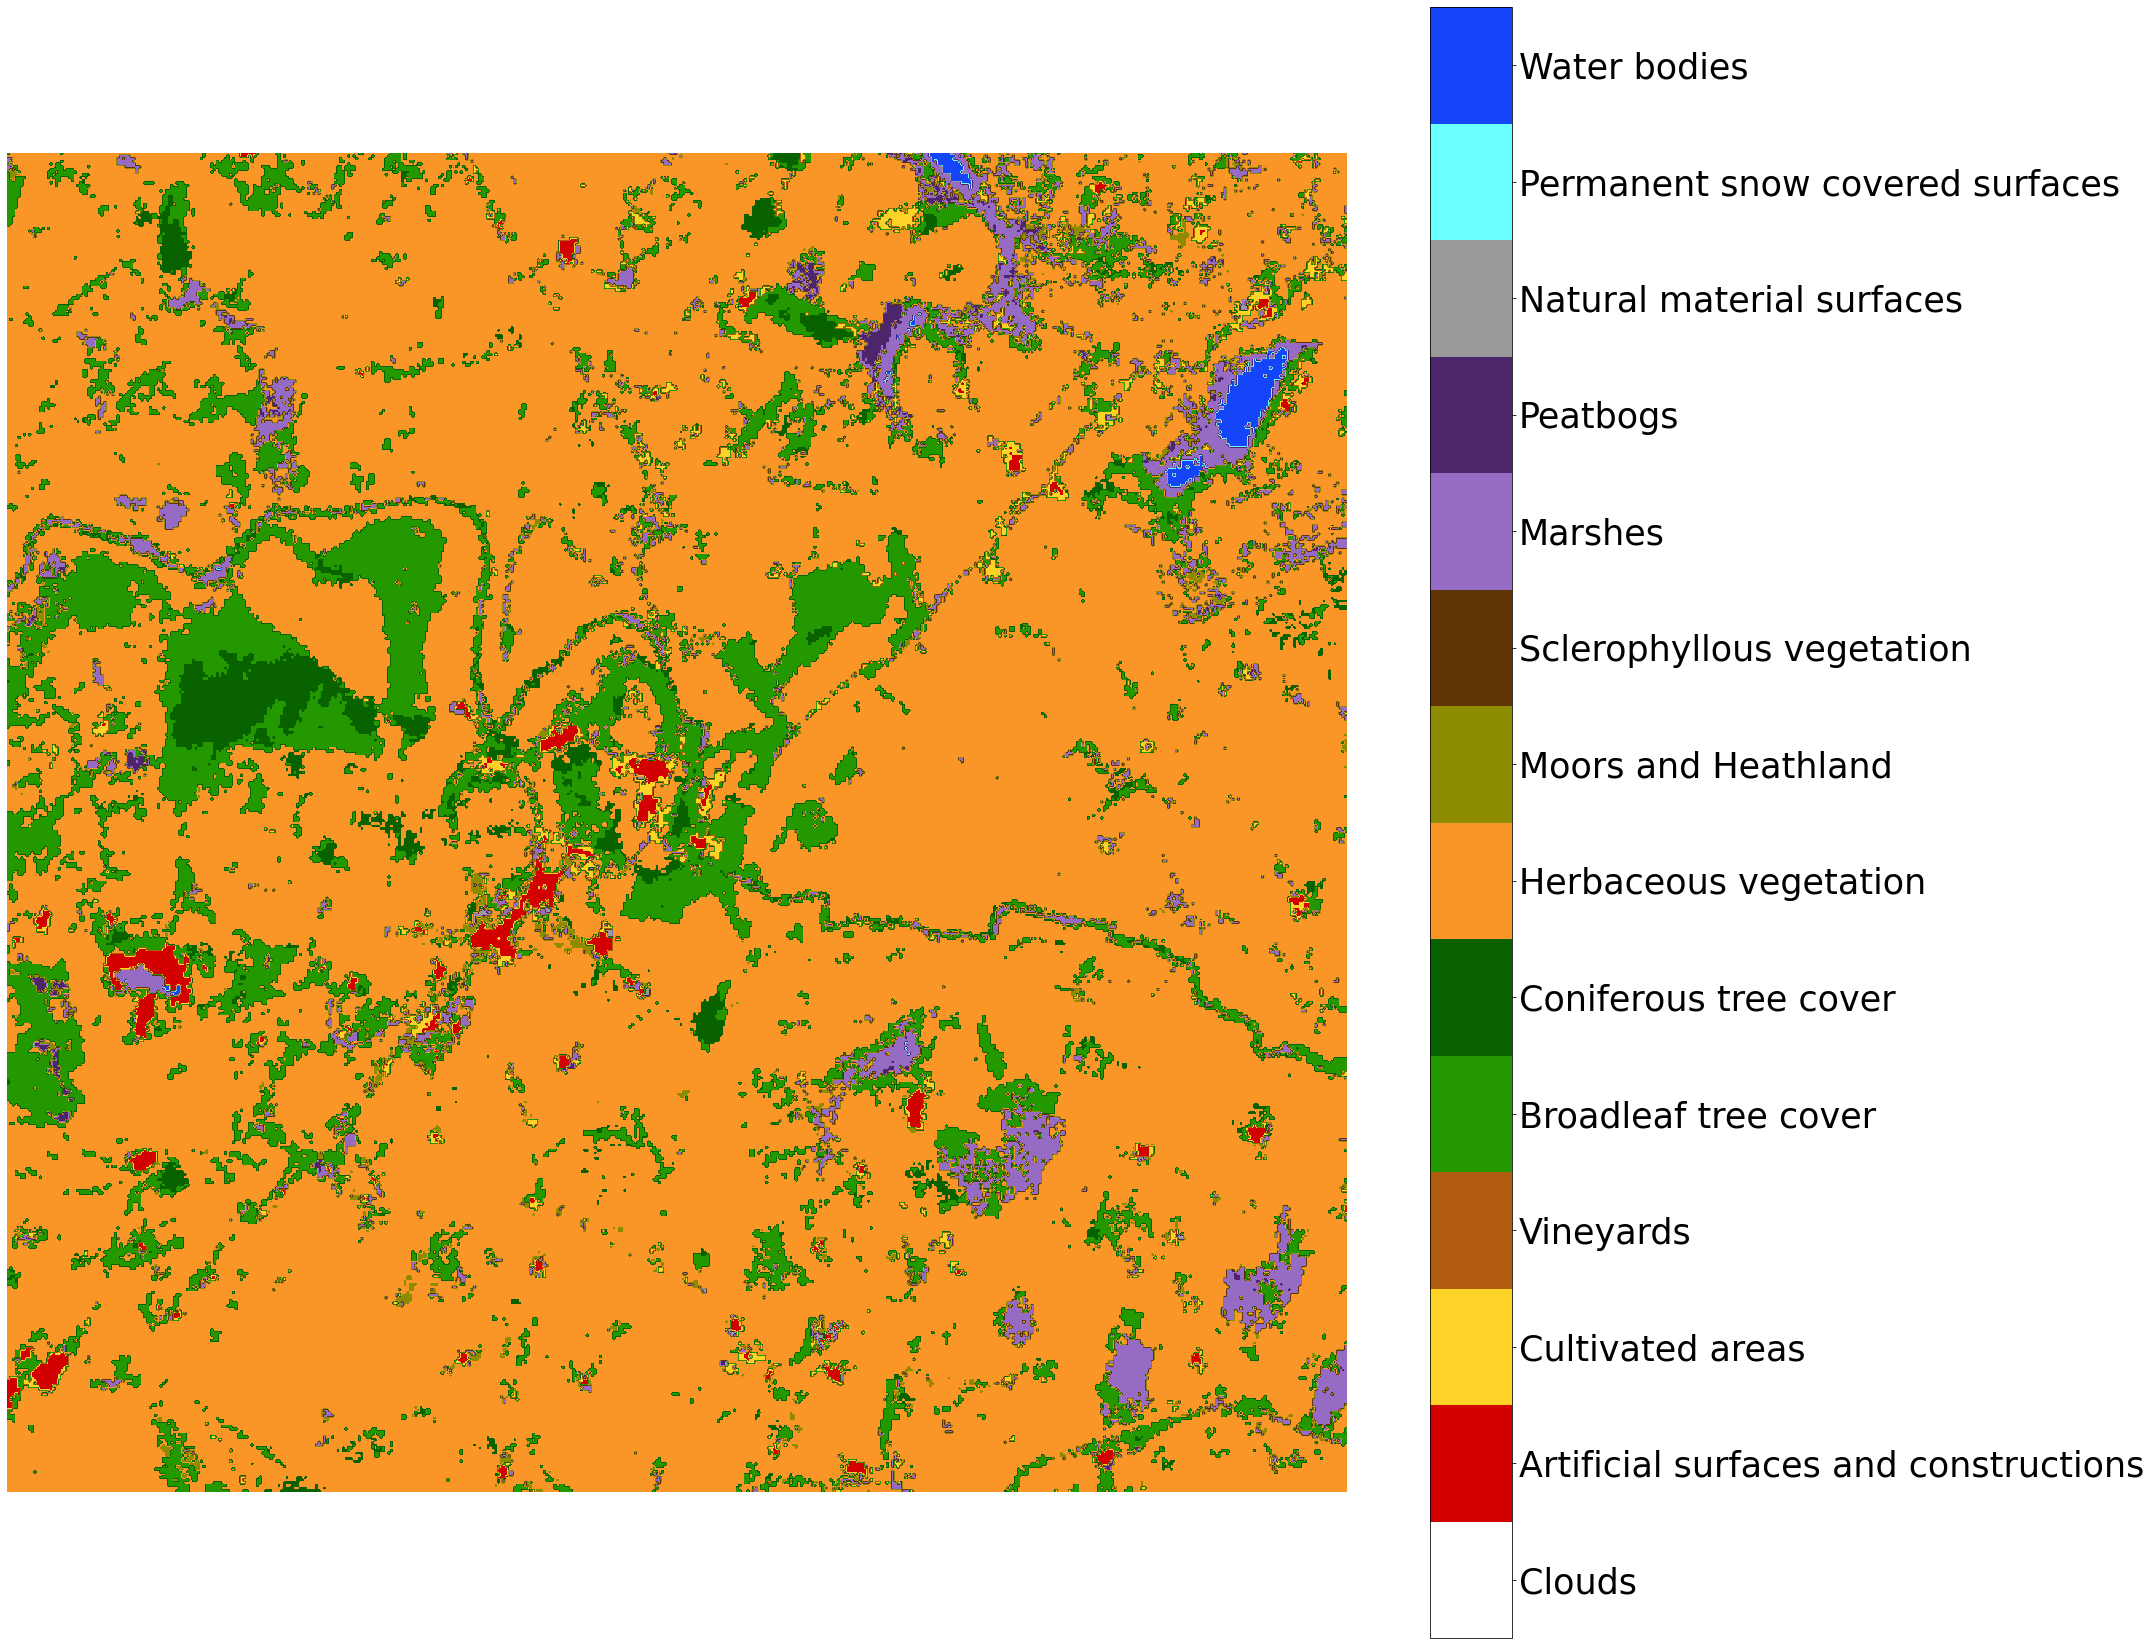

In [85]:
fig=plt.figure(figsize=(30,30))
ax=fig.gca()
c=ax.imshow(Arp,vmin=-0.5,vmax=13.5,cmap=newcmap)
cb=plt.colorbar(c, ax=ax , ticks=np.arange(0,len(U)-0.5)) 
cb.set_ticklabels(labellist)
cb.ax.tick_params(labelsize=35)
ax.axis('off')
fig.savefig('ballyhaise.png')

In [79]:
len(np.arange(0.5,len(U)+0.5))

14

In [9]:
gdal.Info(ds,format='json')

{'bands': [{'band': 1,
   'block': [4000, 2],
   'colorInterpretation': 'Gray',
   'metadata': {},
   'noDataValue': 255.0,
   'type': 'Byte'}],
 'coordinateSystem': {'wkt': 'PROJCS["ETRS89 / LAEA Europe",\n    GEOGCS["ETRS89",\n        DATUM["European_Terrestrial_Reference_System_1989",\n            SPHEROID["GRS 1980",6378137,298.257222101,\n                AUTHORITY["EPSG","7019"]],\n            TOWGS84[0,0,0,0,0,0,0],\n            AUTHORITY["EPSG","6258"]],\n        PRIMEM["Greenwich",0,\n            AUTHORITY["EPSG","8901"]],\n        UNIT["degree",0.0174532925199433,\n            AUTHORITY["EPSG","9122"]],\n        AUTHORITY["EPSG","4258"]],\n    PROJECTION["Lambert_Azimuthal_Equal_Area"],\n    PARAMETER["latitude_of_center",52],\n    PARAMETER["longitude_of_center",10],\n    PARAMETER["false_easting",4321000],\n    PARAMETER["false_northing",3210000],\n    UNIT["metre",1,\n        AUTHORITY["EPSG","9001"]],\n    AUTHORITY["EPSG","3035"]]'},
 'cornerCoordinates': {'center': [3199